In [1]:
!pip install numpy
!pip install pandas
# !pip install scipy
# !pip install scikit-learn
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly
# !pip install plotly-express
!pip install sklearn.preprocessing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

ERROR: Could not find a version that satisfies the requirement sklearn.preprocessing (from versions: none)
ERROR: No matching distribution found for sklearn.preprocessing


In [2]:
from re import I


data = pd.read_csv('https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv')

In [3]:
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link
0,2022-08-22,2022-08-22,Indoor Run / Jog,414,3.09999,1801,9.68280,9.95841,6.19656,6.02506,144.0,4599.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6797274268
1,2022-08-20,2022-08-20,Run,1544,13.11000,11065,14.06690,7.71115,4.26534,7.78094,140.0,22531.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6793063441
2,2022-08-17,2022-08-17,Indoor Run / Jog,859,6.56000,3600,9.14634,10.36540,6.56000,5.78848,147.0,9295.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6786805174
3,2022-08-15,2022-08-15,Indoor Run / Jog,632,4.74000,3600,12.65820,10.42180,4.74000,5.75715,122.0,8146.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6781978366
4,2022-08-14,2022-08-14,Run,618,6.38464,4663,12.17350,8.81793,4.92875,6.80432,128.0,11001.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6779701822


In [4]:
data.shape

(719, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date Submitted          719 non-null    object 
 1   Workout Date            719 non-null    object 
 2   Activity Type           719 non-null    object 
 3   Calories Burned (kCal)  719 non-null    int64  
 4   Distance (mi)           719 non-null    float64
 5   Workout Time (seconds)  719 non-null    int64  
 6   Avg Pace (min/mi)       719 non-null    float64
 7   Max Pace (min/mi)       719 non-null    float64
 8   Avg Speed (mi/h)        719 non-null    float64
 9   Max Speed (mi/h)        719 non-null    float64
 10  Avg Heart Rate          479 non-null    float64
 11  Steps                   696 non-null    float64
 12  Notes                   719 non-null    object 
 13  Source                  719 non-null    object 
 14  Link                    719 non-null    ob

In [6]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(data['Distance (mi)'])
data['target'] = labels
data.drop(columns=['Link', 'Source', 'Notes', 'Max Pace (min/mi)', 'Max Speed (mi/h)'], inplace=True)

In [7]:
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Avg Speed (mi/h),Avg Heart Rate,Steps,target
0,2022-08-22,2022-08-22,Indoor Run / Jog,414,3.09999,1801,9.68280,6.19656,144.0,4599.0,275
1,2022-08-20,2022-08-20,Run,1544,13.11000,11065,14.06690,4.26534,140.0,22531.0,546
2,2022-08-17,2022-08-17,Indoor Run / Jog,859,6.56000,3600,9.14634,6.56000,147.0,9295.0,513
3,2022-08-15,2022-08-15,Indoor Run / Jog,632,4.74000,3600,12.65820,4.74000,122.0,8146.0,459
4,2022-08-14,2022-08-14,Run,618,6.38464,4663,12.17350,4.92875,128.0,11001.0,510


In [8]:
data.isnull().sum()

Date Submitted              0
Workout Date                0
Activity Type               0
Calories Burned (kCal)      0
Distance (mi)               0
Workout Time (seconds)      0
Avg Pace (min/mi)           0
Avg Speed (mi/h)            0
Avg Heart Rate            240
Steps                      23
target                      0
dtype: int64

In [9]:
data['Date Submitted'] = pd.to_datetime(data['Date Submitted'], format='%Y-%m-%d')
data['Workout Date'] = pd.to_datetime(data['Workout Date'], format='%Y-%m-%d')

In [10]:
data.describe()

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Avg Speed (mi/h),Avg Heart Rate,Steps,target
count,719.00000,719.000000,719.000000,719.000000,719.000000,479.000000,696.000000,719.000000
mean,399.05007,3.155500,2073.652295,11.440667,5.523150,109.125261,5134.306034,271.237830
std,258.66604,2.012661,1289.393440,6.991355,1.701165,61.780393,3227.885210,150.367184
min,9.00000,0.000000,95.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,239.00000,2.008110,1471.000000,9.074935,4.973630,93.500000,3471.250000,155.500000
50%,403.00000,3.100000,1800.000000,9.742530,6.106150,143.000000,4677.000000,276.000000
75%,453.50000,3.558525,2341.000000,11.109150,6.553425,153.000000,5803.000000,386.500000
max,1928.00000,13.481600,11065.000000,123.477000,14.863700,169.000000,23604.000000,550.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
d1 = data.sort_values(by='Avg Pace (min/mi)', ascending=False)
data.head(11)

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Avg Speed (mi/h),Avg Heart Rate,Steps,target
0,2022-08-22,2022-08-22,Indoor Run / Jog,414,3.09999,1801,9.68280,6.19656,144.0,4599.0,275
1,2022-08-20,2022-08-20,Run,1544,13.11000,11065,14.06690,4.26534,140.0,22531.0,546
2,2022-08-17,2022-08-17,Indoor Run / Jog,859,6.56000,3600,9.14634,6.56000,147.0,9295.0,513
3,2022-08-15,2022-08-15,Indoor Run / Jog,632,4.74000,3600,12.65820,4.74000,122.0,8146.0,459
4,2022-08-14,2022-08-14,Run,618,6.38464,4663,12.17350,4.92875,128.0,11001.0,510
5,2022-08-12,2022-08-12,Indoor Run / Jog,831,6.21000,3617,9.70746,6.18081,144.0,9306.0,501
6,2022-08-11,2022-08-11,Run,576,4.62746,3712,13.36610,4.48896,116.0,7878.0,457
7,2022-08-10,2022-08-10,Run,863,7.02161,4441,10.53930,5.69300,144.0,11520.0,523
8,2022-08-09,2022-08-09,Run,626,6.35313,4274,11.21040,5.35219,145.0,11074.0,509
9,2022-08-08,2022-08-08,Run,797,6.34867,4013,10.53180,5.69702,146.0,10360.0,508


In [13]:
# data = data[data['Avg Pace (min/mi)'] < 20]
# data = data[data['Avg Pace (min/mi)'] > 0]
# data = data[data['Max Pace (min/mi)'] < 20]
# data = data[data['Max Pace (min/mi)'] > 0]
# data.head(11)
data['Avg Heart Rate'].fillna(data['Avg Heart Rate'].median(), inplace=True)
data.fillna(0, inplace=True)
# data.sort_values(by='Avg Pace (min/mi)', ascending=False)

#replace the extremely large values with the median
data.loc[data['Avg Pace (min/mi)'] > 20, 'Avg Pace (min/mi)'] = data['Avg Pace (min/mi)'].median()
#Use numpy instead of pandas to calculate the median
data['Avg Heart Rate'] = np.where(data['Avg Heart Rate'] < 30, data['Avg Heart Rate'].median(), data['Avg Heart Rate'])

<AxesSubplot:xlabel='Activity Type', ylabel='count'>

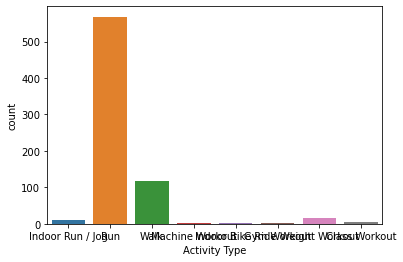

In [14]:
sns.countplot(x='Activity Type', data=data)

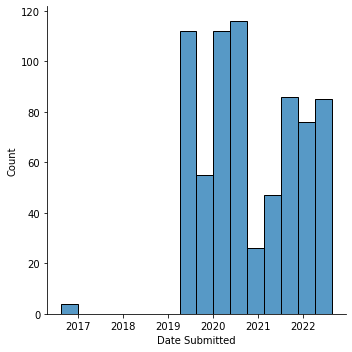

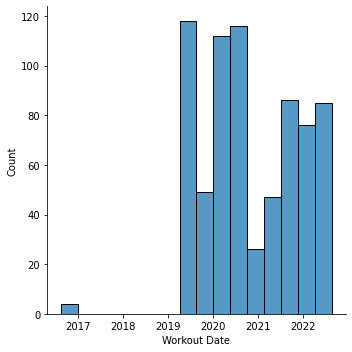

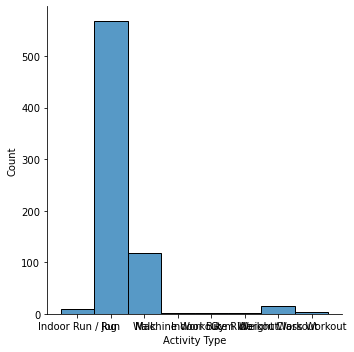

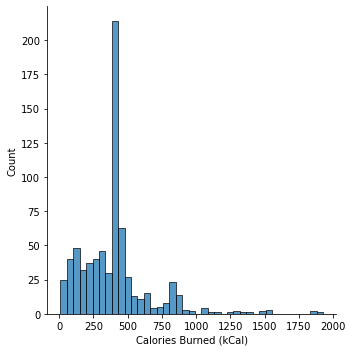

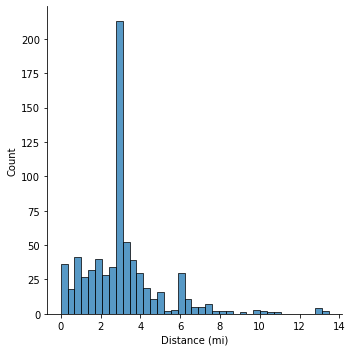

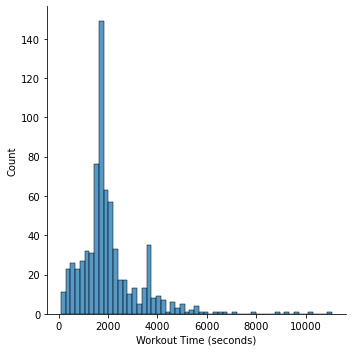

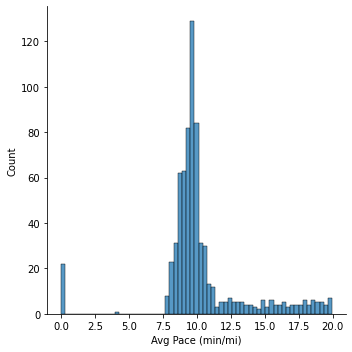

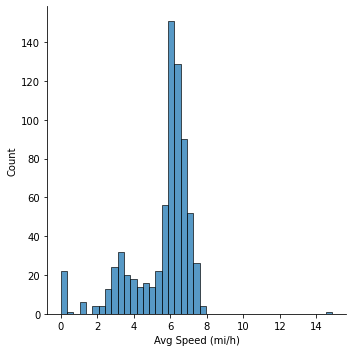

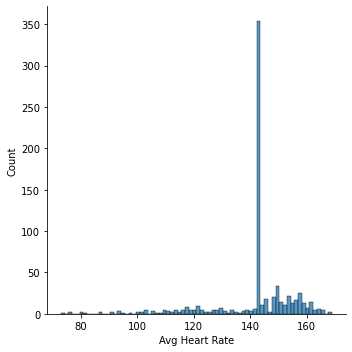

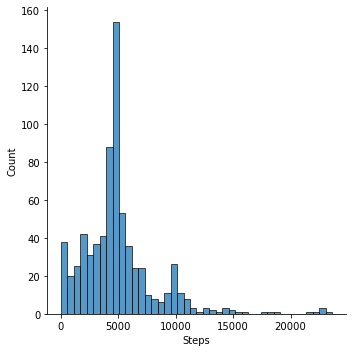

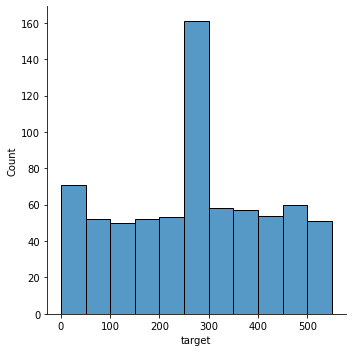

In [15]:
for column in data:
    sns.displot(x=column, data=data)

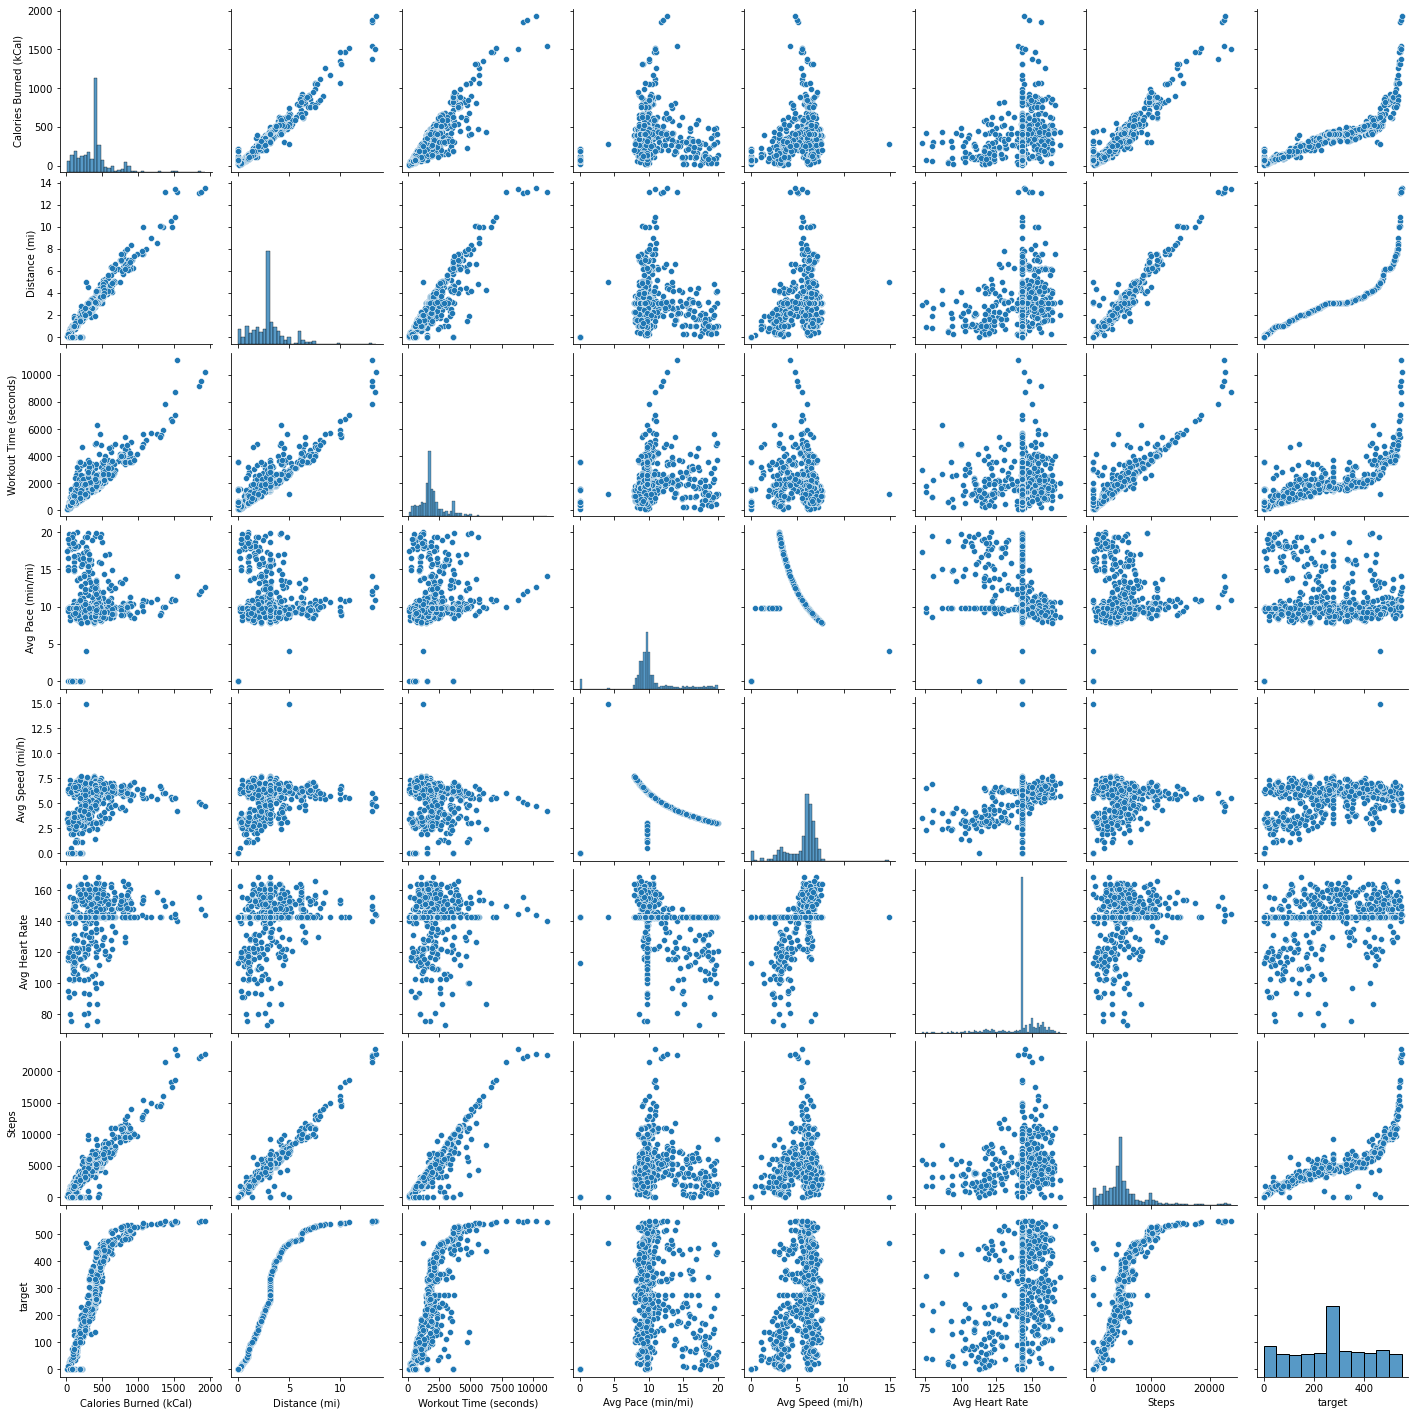

In [16]:
sns.pairplot(data)